# Importing the Data

In [89]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [90]:
Bin_Yearly = nifty50_data['Close'].pct_change(periods=252) * 100
Bin50_Day = nifty50_data['Close'].rolling(window=50).mean()
Bin200_Day = nifty50_data['Close'].rolling(window=200).mean()

In [123]:
# # Perform a simple analysis - plot the closing prices over time
# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.title('Nifty50 Closing Prices Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [66]:
# # Moving Average Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
# plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
# plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [125]:
# # Yearly Returns Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
# plt.title('Nifty50 Yearly Returns Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Yearly Return (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

## Cleaning and Pre processing

In [91]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits'])

In [121]:
nifty50_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:

# nifty50_data = nifty50_data.drop(columns=['50-Day MA', '200-Day MA', 'Yearly Return'])

# nifty50_data.fillna({
#     '50-Day MA': nifty50_data['50-Day MA'].median(),
#     '200-Day MA': nifty50_data['200-Day MA'].median(),
#     'Yearly Return': nifty50_data['Yearly Return'].median()
# }, inplace=True)


Creating 3 bins, 50-Day Average, 200-Day Average, Yearly-Average

In [93]:
Bin50_Day.fillna(Bin50_Day.mode()[0], inplace=True)
Bin200_Day.fillna(Bin200_Day.mode()[0], inplace=True)
Bin_Yearly.fillna(Bin_Yearly.mode()[0], inplace=True)

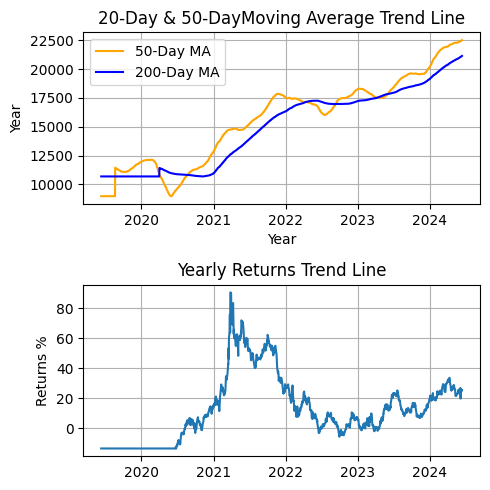

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

# Plotting the Histogram
axes[0].plot(Bin50_Day, label='50-Day MA', color='orange')
axes[0].plot(Bin200_Day, label='200-Day MA', color='blue')
axes[0].set_title('20-Day & 50-DayMoving Average Trend Line')
axes[0].set_ylabel('Year')
axes[0].set_xlabel('Value')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(Bin_Yearly)
axes[1].set_title('Yearly Returns Trend Line')
axes[0].set_xlabel('Year')
axes[1].set_ylabel('Returns %')
axes[1].grid(True)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()